## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("cleaned_data.csv")


## Dataset Overview

In [ ]:
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408540 entries, 0 to 3408539
Data columns (total 37 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE_x            object 
 5   ORIGIN_AIRPORT       object 
 6   DESTINATION_AIRPORT  object 
 7   SCHEDULED_DEPARTURE  int64  
 8   DEPARTURE_TIME       float64
 9   DEPARTURE_DELAY      float64
 10  SCHEDULED_ARRIVAL    int64  
 11  ARRIVAL_TIME         float64
 12  ARRIVAL_DELAY        float64
 13  DIVERTED             int64  
 14  CANCELLED            int64  
 15  AIR_SYSTEM_DELAY     float64
 16  AIRLINE_DELAY        float64
 17  LATE_AIRCRAFT_DELAY  float64
 18  WEATHER_DELAY        float64
 19  IATA_CODE            object 
 20  AIRLINE_y            object 
 21  IATA_CODE_origin     object 
 22  AIRPORT              object 
 23  CITY                 object 
 24

## Counting and Distribution

### Airlines and Busy Airports:

In [ ]:
print("Flights per airline:\n", df['AIRLINE_x'].value_counts())
print("Top 10 Origin Airports:\n", df['ORIGIN_AIRPORT'].value_counts().head(10))
print("Top 10 Destination Airports:\n", df['DESTINATION_AIRPORT'].value_counts().head(10))

Flights per airline:
 AIRLINE_x
WN    736572
DL    504177
EV    347154
AA    344886
OO    344180
UA    296380
US    198715
MQ    186210
B6    155033
AS     99224
NK     65904
F9     50801
HA     44674
VX     34630
Name: count, dtype: int64
Top 10 Origin Airports:
 ORIGIN_AIRPORT
ATL    219665
ORD    179809
DFW    156627
DEN    124618
LAX    124310
IAH     95758
PHX     95201
SFO     92653
LAS     84409
MCO     72225
Name: count, dtype: int64
Top 10 Destination Airports:
 DESTINATION_AIRPORT
ATL    219877
ORD    179934
DFW    156700
DEN    124580
LAX    124326
IAH     95828
PHX     95178
SFO     92644
LAS     84418
MCO     72212
Name: count, dtype: int64


### Cancelled/Diverted Flights:

In [ ]:
print("Cancelled breakdown:\n", df['CANCELLED'].value_counts())
print("Diverted breakdown:\n", df['DIVERTED'].value_counts())


Cancelled breakdown:
 CANCELLED
0    3340926
1      67614
Name: count, dtype: int64
Diverted breakdown:
 DIVERTED
0    3398889
1       9651
Name: count, dtype: int64


## Delay Distributions

### Departure & Arrival Delays

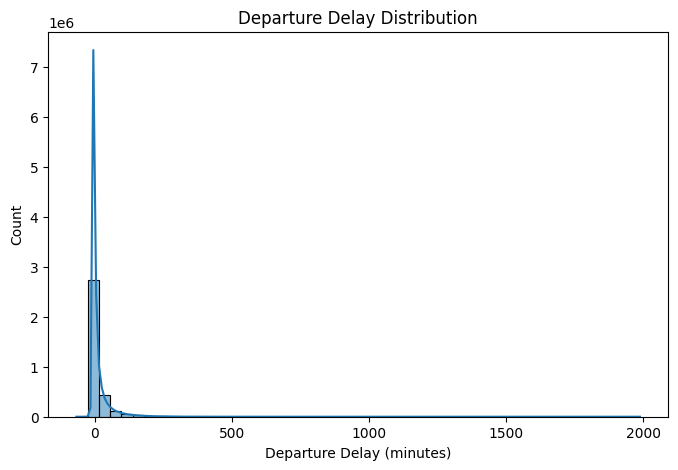

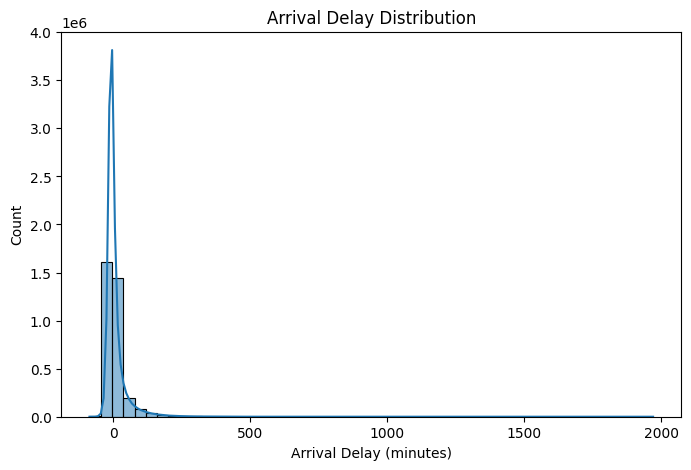

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['DEPARTURE_DELAY'], bins=50, kde=True)
plt.title('Departure Delay Distribution')
plt.xlabel('Departure Delay (minutes)')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['ARRIVAL_DELAY'], bins=50, kde=True)
plt.title('Arrival Delay Distribution')
plt.xlabel('Arrival Delay (minutes)')
plt.show()


### Flights by Day/Month:

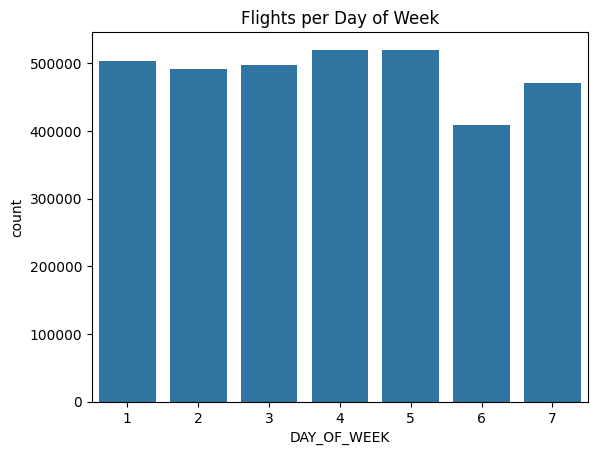

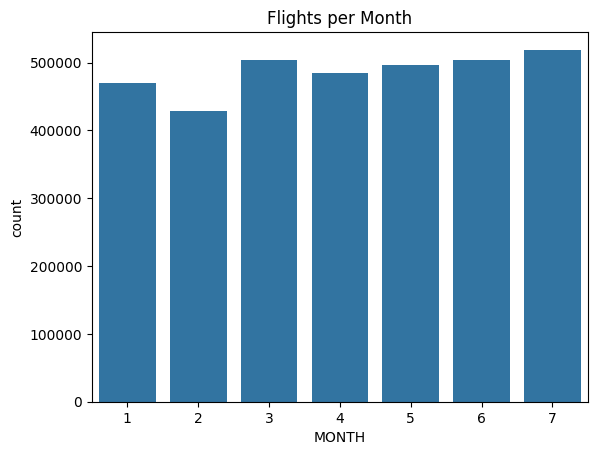

In [ ]:
sns.countplot(x='DAY_OF_WEEK', data=df)
plt.title('Flights per Day of Week')
plt.show()

sns.countplot(x='MONTH', data=df)
plt.title('Flights per Month')
plt.show()


## Correlation Analysis

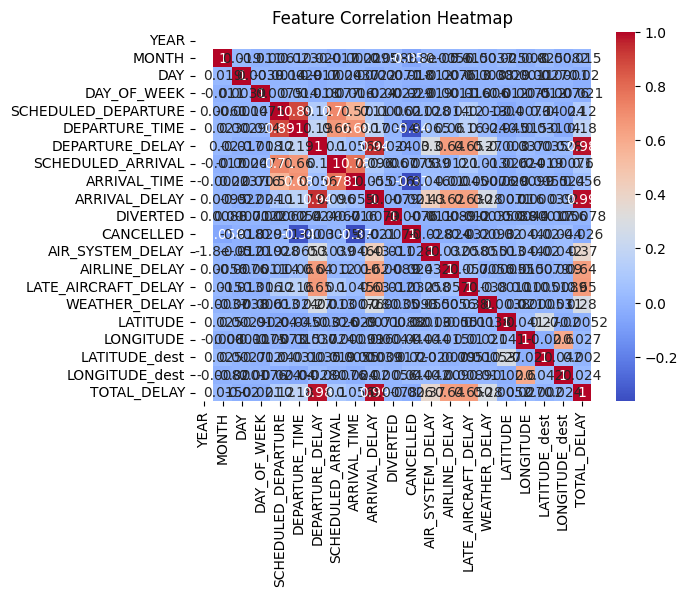

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


## KPI Computations

In [ ]:
avg_arr_delay = df['ARRIVAL_DELAY'].mean()
avg_dep_delay = df['DEPARTURE_DELAY'].mean()
pct_delayed = (df['ARRIVAL_DELAY'] > 15).mean() * 100
pct_cancelled = df['CANCELLED'].mean() * 100
pct_diverted = df['DIVERTED'].mean() * 100

print(f"Average arrival delay: {avg_arr_delay:.2f} min")
print(f"Average departure delay: {avg_dep_delay:.2f} min")
print(f"Percent of flights delayed (>15 min): {pct_delayed:.2f}%")
print(f"Percent of flights cancelled: {pct_cancelled:.2f}%")
print(f"Percent of flights diverted: {pct_diverted:.2f}%")


Average arrival delay: 5.92 min
Average departure delay: 10.34 min
Percent of flights delayed (>15 min): 19.26%
Percent of flights cancelled: 1.98%
Percent of flights diverted: 0.28%


## Best/Worst Airlines for Delays

In [ ]:
airline_delays = df.groupby('AIRLINE_x')['ARRIVAL_DELAY'].mean().sort_values()
print("Airline delays:\n", airline_delays)


Airline delays:
 AIRLINE_x
AS    -0.862533
DL     1.583674
HA     2.333438
US     3.622429
VX     5.029223
WN     5.740704
AA     5.755424
OO     6.367064
B6     6.593848
EV     8.059875
UA     8.127100
MQ    10.013136
NK    16.662964
F9    17.370524
Name: ARRIVAL_DELAY, dtype: float64


## Delay Trends Over Time

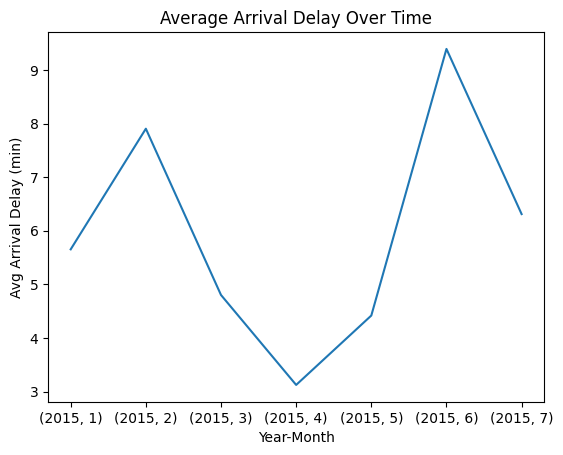

In [ ]:
trend = df.groupby(['YEAR', 'MONTH'])['ARRIVAL_DELAY'].mean()
trend.plot()
plt.title('Average Arrival Delay Over Time')
plt.ylabel('Avg Arrival Delay (min)')
plt.xlabel('Year-Month')
plt.show()


## Delay Reasons

Mean delay by reason (in minutes):
 AIR_SYSTEM_DELAY       2.699420
WEATHER_DELAY          0.607182
AIRLINE_DELAY          3.726965
LATE_AIRCRAFT_DELAY    4.774378
dtype: float64


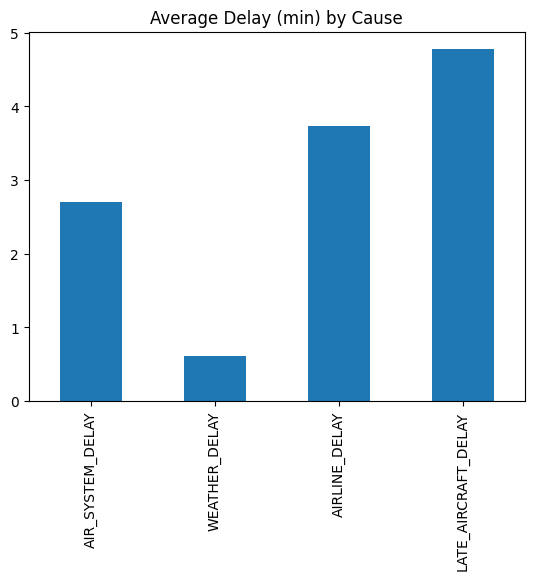

In [ ]:
delay_reasons = ['AIR_SYSTEM_DELAY', 'WEATHER_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY']
reason_means = df[delay_reasons].mean()
print("Mean delay by reason (in minutes):\n", reason_means)
reason_means.plot(kind='bar')
plt.title('Average Delay (min) by Cause')
plt.show()

## Most Delayed Airports

Airports with highest delays:
 ORIGIN_AIRPORT
GST    22.890909
ILG    22.860000
PPG    19.147059
BPT    18.181818
STC    18.144578
HYA    17.750000
TTN    16.050662
COU    15.102286
MVY    14.844828
JLN    14.117925
Name: ARRIVAL_DELAY, dtype: float64


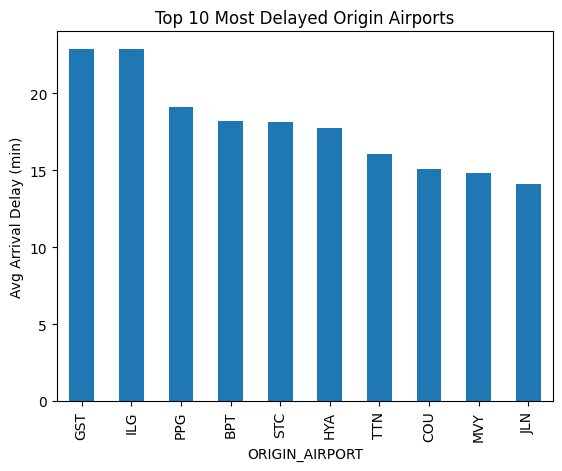

In [ ]:
airport_delays = df.groupby('ORIGIN_AIRPORT')['ARRIVAL_DELAY'].mean().sort_values(ascending=False).head(10)
print("Airports with highest delays:\n", airport_delays)
airport_delays.plot(kind='bar')
plt.title('Top 10 Most Delayed Origin Airports')
plt.ylabel('Avg Arrival Delay (min)')
plt.show()


## Hourly and Time-of-Day Delay Patterns

HOUR
0      1.841063
1      5.145846
2      3.725209
3      1.536534
4      3.206989
5     -3.061355
6     -1.732171
7     -0.356542
8      1.099662
9      2.136929
10     3.244631
11     3.961646
12     5.171709
13     6.451750
14     7.791851
15     8.873546
16    10.020321
17    10.943517
18    11.960819
19    12.203284
20    11.812340
21     9.880190
22     8.149151
23     4.214530
Name: ARRIVAL_DELAY, dtype: float64


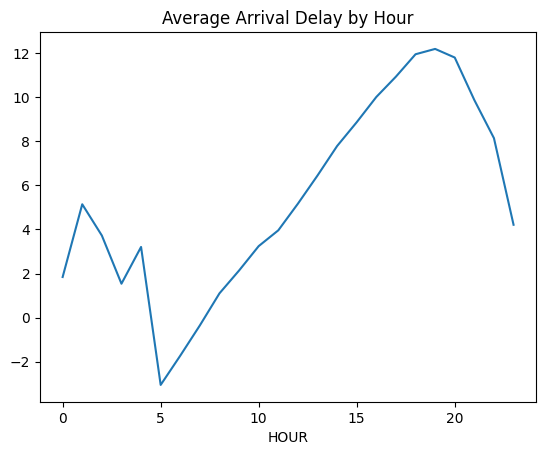

In [ ]:
df['HOUR'] = df['SCHEDULED_DEPARTURE'] // 100  # if in 24-hour format
hourly_delays = df.groupby('HOUR')['ARRIVAL_DELAY'].mean()
print(hourly_delays)
hourly_delays.plot(kind='line')
plt.title('Average Arrival Delay by Hour')
plt.show()


## Delay Cause Analysis by Airport/Route

In [ ]:
airport_causes = df.groupby('ORIGIN_AIRPORT')[['AIR_SYSTEM_DELAY', 'WEATHER_DELAY', 'AIRLINE_DELAY']].mean()
print(airport_causes.sort_values('WEATHER_DELAY', ascending=False).head())


                AIR_SYSTEM_DELAY  WEATHER_DELAY  AIRLINE_DELAY
ORIGIN_AIRPORT                                                
ROW                     3.720257       4.591640       3.438907
HOB                     3.447439       3.571429       2.741240
SUX                     5.289340       2.987310       2.477157
ABI                     2.441967       2.471475       3.460328
LAW                     2.115159       2.227967       4.196240


## **Summary of Insights**

Average arrival delay is **5.92** minutes.

Airline **AS** is the most punctual, while Airline **F9** suffers most delays.

Top delay cause is “**Late Aircraft**” contributing **5** min per flight.

Airport **GST** has the highest average arrival delays.

% of delayed flights (over 15 min) is **19.26%**. % OF cancelled Flights is **1.98%**.

Most flights are delayed in evening hours.

